# 1) Importing modules & Preprocessing

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
!pip install folium
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [100]:
# create model_evaluation chart
model_eval = pd.DataFrame(columns = ['Model', 
                                    'Details', 
                                    'Root Mean Squared Error (RMSE)',
                                    'R-squared (training)',
                                    'Adjusted R-squared (training)',
                                    'R-squared (test)',
                                    'Adjusted R-squared (test)',
                                    '5-Fold Cross Validation'])

## Importing the dataset

In [101]:
df = pd.read_csv('kc_house_data.csv')
# show first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [102]:
# basic dataset statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [103]:
# checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


## Method for calculating adjusted R^2

In [104]:
def adjustedR2(r2,n,k):
  return r2-(k-1)/(n-k)*(1-r2)

# 2) Create Simple Linear Regression

Simple linear regression has one independent variable (IV) and one dependent variable (price). I choose the most important IV from the columns: living area (sqft). 

In [105]:
#%%capture
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

# Import model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Create training set
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)

# Create test set
X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

# fit the model with x & y vars
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Prediction & Evaluation

In [106]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),'.3f'))

# <2 ways for getting r2 scores>
# 1) lr.score only require (input_X, known_y) variables -> autocalculates pred_y and find r2 using the fitted model
# r2_train = float(format(lr.score(X_train, y_train),'.3f'))
# r2_test = float(format(lr.score(X_test, y_test),'.3f'))

# 2) r2_score function only require (known_y, prediected_y)
from sklearn.metrics import r2_score 
r2_train = format(r2_score(y_train,y_train_pred),'.3f')
r2_test = format(r2_score(y_test,y_test_pred), '.3f')

cv = float(format(cross_val_score(lr,df[["sqft_living"]],df[["price"]],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
# print('Intercept: {}'.format(lr.intercept_))
# print('Coefficient: {}'.format(lr.coef_))
print("Equation: {} + {}x".format(lr.intercept_, lr.coef_))
# print("Simple Linear Regression -> RMSE: {}, r2_train: {}, r2_test: {}, CV_score: {}".format(rmse,r2_train,r2_test,cv))

# add row using df.append or df.loc[#]
model_eval.loc[0] = ['Simple Linear Regression', '', rmse, r2_train, '', r2_test, '', cv]
model_eval

Average Price for Test Data: 539744.130
Equation: -47235.811302901246 + [282.2468152]x


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,,254289.149,0.492,,0.496,,0.491


## Visualizing the result

In [107]:
sns.set(style="white", font_scale=1)

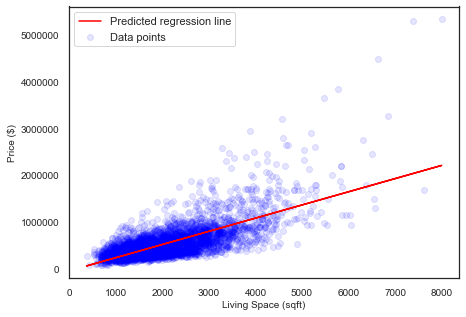

In [108]:
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, color = 'blue', label="Data points", alpha=.1)
plt.plot(X_test,y_test_pred, color="red", label="Predicted regression line")
plt.xlabel("Living Space (sqft)", fontsize=10)
plt.ylabel("Price ($)", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)

# 3) Analyzing the dataset with visualization

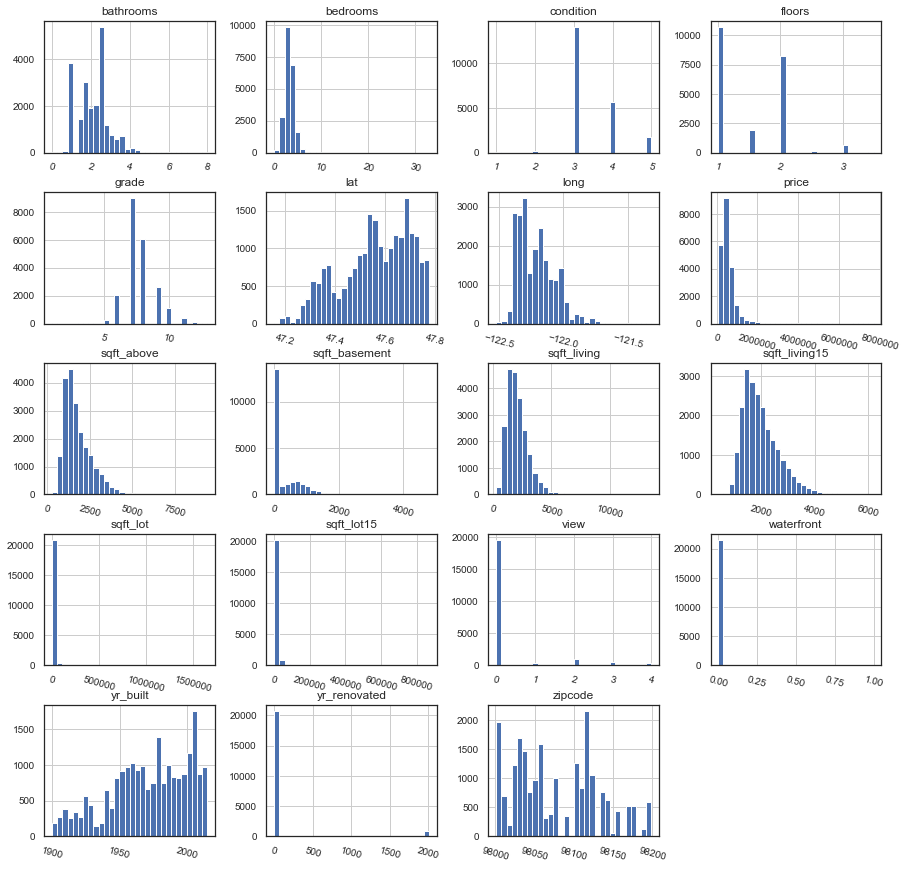

In [109]:
# histograms of dataset
df_hist = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df_hist.hist(bins=30,figsize=(15,15),xlabelsize='10',ylabelsize='10',xrot=-15)
#sns.despine(left=True, bottom=True)
#[x.title.set_size(12) for x in h.ravel()];
#[x.yaxis.tick_left() for x in h.ravel()];

We can see from above that there are few outliers in the dataset (mostly for extra luxury houses). These are more apparent in number of bedrooms, bathrooms, and price. Aside from this pattern, we see the most number in common houses (with more reasonable number of bedrooms, bathrooms, price). Because outliers always exists in houses, and they are part of reality, it makes sense to keep them.

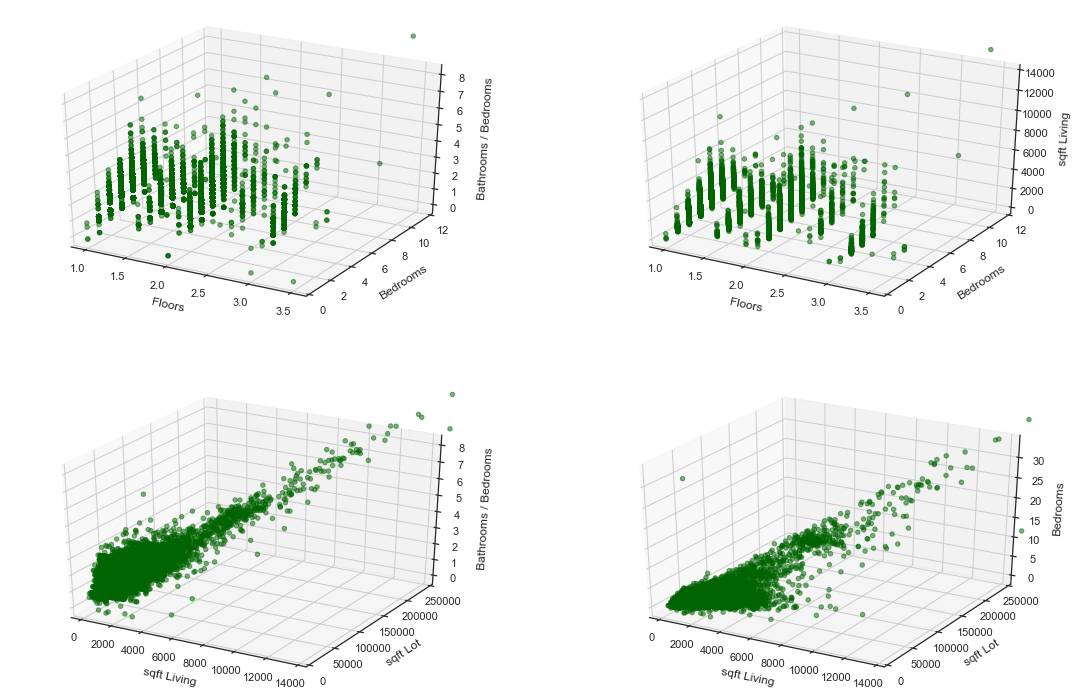

In [110]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1, projection="3d")
ax.scatter(df['floors'], df['bedrooms'], df['bathrooms'], c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(df['floors'],df['bedrooms'],df['sqft_living'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft Living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3, projection="3d")
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bedrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='Bedrooms')
ax.set(ylim=[0,250000]);

Above scatter plot shows positive relationship between [bedrooms vs bathroom/bedroom] and [bedrooms vs sqft living]. However, floors do not show significant relationship to either. Lower two plots tell us where the concentration of housing features are compared to outliers.

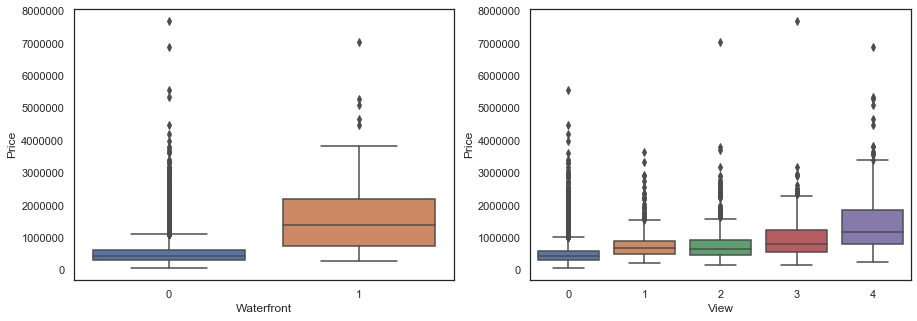

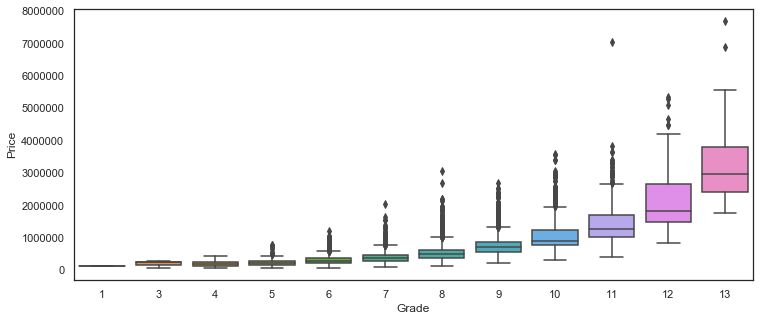

In [111]:
# create figure and axes - 1st row
f, axes = plt.subplots(1, 2,figsize=(15,5))

# axes[0] plot
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
axes[0].set(xlabel='Waterfront', ylabel='Price')
# axes[0].yaxis.tick_left()

# axes[1] plot
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
# axes[1].yaxis.set_label_position("right")
# axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

# sns.despine(left=True, bottom=True)


# 2nd row plot
f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
# sns.despine(left=True, bottom=True)
# axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');

Above plots show waterfront and grade having pretty significant impact on price. View also has impact, but not as salient as the other two features.

[Text(0.5, 0, 'Yr Built'), Text(0.5, 0, 'Grade'), Text(0.5, 0, 'View')]

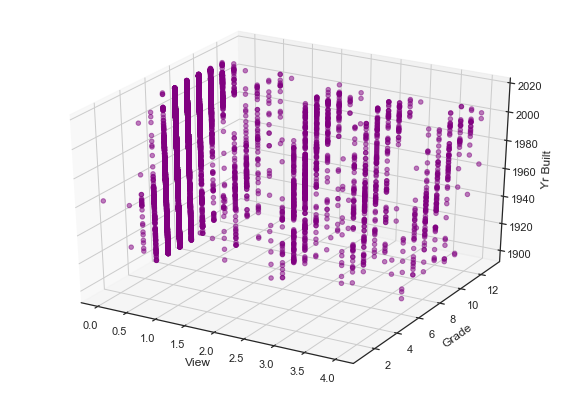

In [112]:
fig = plt.figure(figsize = (10,7))
ax1 = fig.add_subplot(1,1,1, projection = "3d")
ax1.scatter(train_data['view'], train_data['grade'], train_data['yr_built'], c='purple', alpha=.5)
ax1.set(xlabel='View', ylabel='Grade', zlabel='Yr Built')

Above shows not much impact of view in relationship to grade and yr built. However, there is an obvious positive trend between grade and yr built.

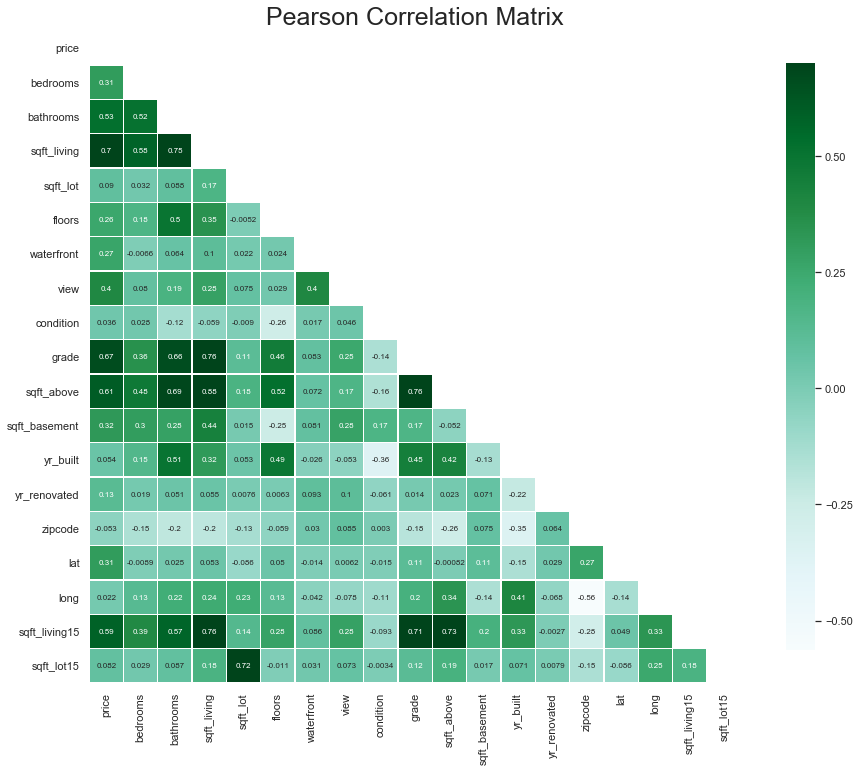

In [113]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

# hide all unnecessary correlation points
mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),
            linewidths=0.25,
            vmax=0.7,square=True,
            cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',
            annot=True,
            annot_kws={"size":8},
            mask=mask,
            cbar_kws={"shrink": .9});

Correlation is taken into account to reduce dimensionality, therefore reducing the effect of overfitting. It depends on the situation, but it's something that should be considered.

## 3) Analysis & Models

## Multiple Regression #1

In [114]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

mult_regression_1 = LinearRegression()
mult_regression_1.fit(train_data[features], train_data['price'])

# print the equation
print("Equation: {}".format(mult_regression_1.intercept_))
      
print("Coefficients: {}".format(mult_regression_1.coef_))

Equation: -57221293.13485892
Coefficients: [-5.68950279e+04  1.13310062e+04  3.18389287e+02 -2.90807628e-01
 -5.79609821e+03  5.84022824e+02]


In [117]:
# make prediction
pred = mult_regression_1.predict(test_data[features])

# evaluate the model
rmse = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))

# <2 ways for getting r2 scores>
# 1) lr.score only require (input_X, known_y) variables -> autocalculates pred_y and find r2 using the fitted model
r2_train = format(mult_regression_1.score(train_data[features], train_data['price']),'.3f')
r2_test = format(mult_regression_1.score(test_data[features], test_data['price']),'.3f')

# 2) r2_score function only require (known_y, prediected_y)
# from sklearn.metrics import r2_score 
# r2_train = format(r2_score(y_train,y_train_pred),'.3f')
# r2_test = format(r2_score(y_test,y_test_pred), '.3f')

# AdjustedR2
adj_r2_train = format(adjustedR2(mult_regression_1.score(train_data[features], train_data['price']), train_data.shape[0], len(features)), '.3f')
adj_r2_test = format(adjustedR2(mult_regression_1.score(test_data[features], test_data['price']), test_data.shape[0], len(features)), '.3f')

cv = float(format(cross_val_score(mult_regression_1,df[features], df["price"],cv=5).mean(),'.3f'))

# add row using df.append or df.loc[#]
model_eval.loc[1] = ['Multiple Regression 1', '6 features', rmse, r2_train, adj_r2_train, r2_test, adj_r2_test, cv]
model_eval.sort_values(by = '5-Fold Cross Validation', ascending=False)


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Simple Linear Regression,6 features,248514.011,0.514,0.514,0.519,0.518,0.512
0,Simple Linear Regression,,254289.149,0.492,,0.496,,0.491


## Multiple Regression #2

In [120]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mult_regression_2 = LinearRegression()
mult_regression_2.fit(train_data[features], train_data['price'])

# print the equation
print("Equation: {}".format(mult_regression_2.intercept_))
      
print("Coefficients: {}".format(mult_regression_2.coef_))

Equation: 7580919.940385457
Coefficients: [-3.51323305e+04  4.25821114e+04  1.10705020e+02  1.13581822e-01
  6.82992716e+03  5.61794985e+05  5.28174040e+04  2.48918356e+04
  9.57708783e+04  7.01998424e+01  4.05051775e+01 -2.70948034e+03
  2.26715091e+01 -5.80427853e+02  5.98629230e+05 -2.08875497e+05
  2.32857416e+01 -3.75353459e-01]


In [121]:
# make prediction
pred = mult_regression_2.predict(test_data[features])

# evaluate the model
rmse = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))

# <2 ways for getting r2 scores>
# 1) lr.score only require (input_X, known_y) variables -> autocalculates pred_y and find r2 using the fitted model
r2_train = format(mult_regression_2.score(train_data[features], train_data['price']),'.3f')
r2_test = format(mult_regression_2.score(test_data[features], test_data['price']),'.3f')

# 2) r2_score function only require (known_y, prediected_y)
# from sklearn.metrics import r2_score 
# r2_train = format(r2_score(y_train,y_train_pred),'.3f')
# r2_test = format(r2_score(y_test,y_test_pred), '.3f')

# AdjustedR2
adj_r2_train = format(adjustedR2(mult_regression_2.score(train_data[features], train_data['price']), train_data.shape[0], len(features)), '.3f')
adj_r2_test = format(adjustedR2(mult_regression_2.score(test_data[features], test_data['price']), test_data.shape[0], len(features)), '.3f')

cv = float(format(cross_val_score(mult_regression_2,df[features], df["price"],cv=5).mean(),'.3f'))

# add row using df.append or df.loc[#]
model_eval.loc[2] = ['Multiple Regression 2', 'all features', rmse, r2_train, adj_r2_train, r2_test, adj_r2_test, cv]
model_eval.sort_values(by = '5-Fold Cross Validation', ascending=False)


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Simple Linear Regression,all features,193693.989,0.698,0.697,0.708,0.707,0.695
1,Simple Linear Regression,6 features,248514.011,0.514,0.514,0.519,0.518,0.512
0,Simple Linear Regression,,254289.149,0.492,,0.496,,0.491
